In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy 
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [3]:
def remove_rows_from_top(filename, n):
    df = pd.read_csv(filename)  # Đọc dữ liệu từ file CSV
    df = df.iloc[n:]  # Xóa dòng từ trên xuống
    df.to_csv(filename, index=False)  # Ghi lại dữ liệu vào file CSV
    return df
n = 4000000
df_new = remove_rows_from_top('US_Accidents_March23.csv', n)

In [4]:
df_new.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
4000000,A-4030021,Source1,2,2022-12-13 12:45:19,2022-12-13 14:03:12,43.045713,-88.047363,43.038325,-88.047273,0.510,...,False,False,False,False,True,False,Day,Day,Day,Day
4000001,A-4030022,Source1,2,2022-01-17 12:08:00,2022-01-17 14:09:08,29.783896,-95.546130,29.783931,-95.543861,0.136,...,False,False,False,False,False,False,Day,Day,Day,Day
4000002,A-4030023,Source1,2,2022-11-08 07:03:30,2022-11-08 08:50:30,38.748783,-76.879469,38.768111,-76.884740,1.365,...,False,False,False,False,False,False,Day,Day,Day,Day
4000003,A-4030024,Source1,2,2022-11-01 00:43:00,2022-11-01 02:05:06,34.109993,-118.010919,34.108345,-118.010237,0.120,...,False,False,False,False,False,False,Night,Night,Night,Night
4000004,A-4030025,Source1,2,2022-12-19 10:48:00,2022-12-19 12:15:42,42.357973,-79.531784,42.382474,-79.488299,2.792,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df_new['Start_Time'] = df_new['Start_Time'].str.split('.').str[0]
df_new['Start_Time'] = pd.to_datetime(df_new['Start_Time'])
# Extract year, month, day, hour and weekday
df_new['Year']=df_new['Start_Time'].dt.year
df_new['Month']=df_new['Start_Time'].dt.month
df_new['Weekday']=df_new['Start_Time'].dt.weekday
df_new['Day']=df_new['Start_Time'].dt.day

df_new['Hour']=df_new['Start_Time'].dt.hour 
df_new['Minute']=df_new['Start_Time'].dt.minute

df_new.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
4000000,A-4030021,Source1,2,2022-12-13 12:45:19,2022-12-13 14:03:12,43.045713,-88.047363,43.038325,-88.047273,0.510,...,Day,Day,Day,Day,2022,12,1,13,12,45
4000001,A-4030022,Source1,2,2022-01-17 12:08:00,2022-01-17 14:09:08,29.783896,-95.546130,29.783931,-95.543861,0.136,...,Day,Day,Day,Day,2022,1,0,17,12,8
4000002,A-4030023,Source1,2,2022-11-08 07:03:30,2022-11-08 08:50:30,38.748783,-76.879469,38.768111,-76.884740,1.365,...,Day,Day,Day,Day,2022,11,1,8,7,3
4000003,A-4030024,Source1,2,2022-11-01 00:43:00,2022-11-01 02:05:06,34.109993,-118.010919,34.108345,-118.010237,0.120,...,Night,Night,Night,Night,2022,11,1,1,0,43
4000004,A-4030025,Source1,2,2022-12-19 10:48:00,2022-12-19 12:15:42,42.357973,-79.531784,42.382474,-79.488299,2.792,...,Day,Day,Day,Day,2022,12,0,19,10,48


<Axes: >

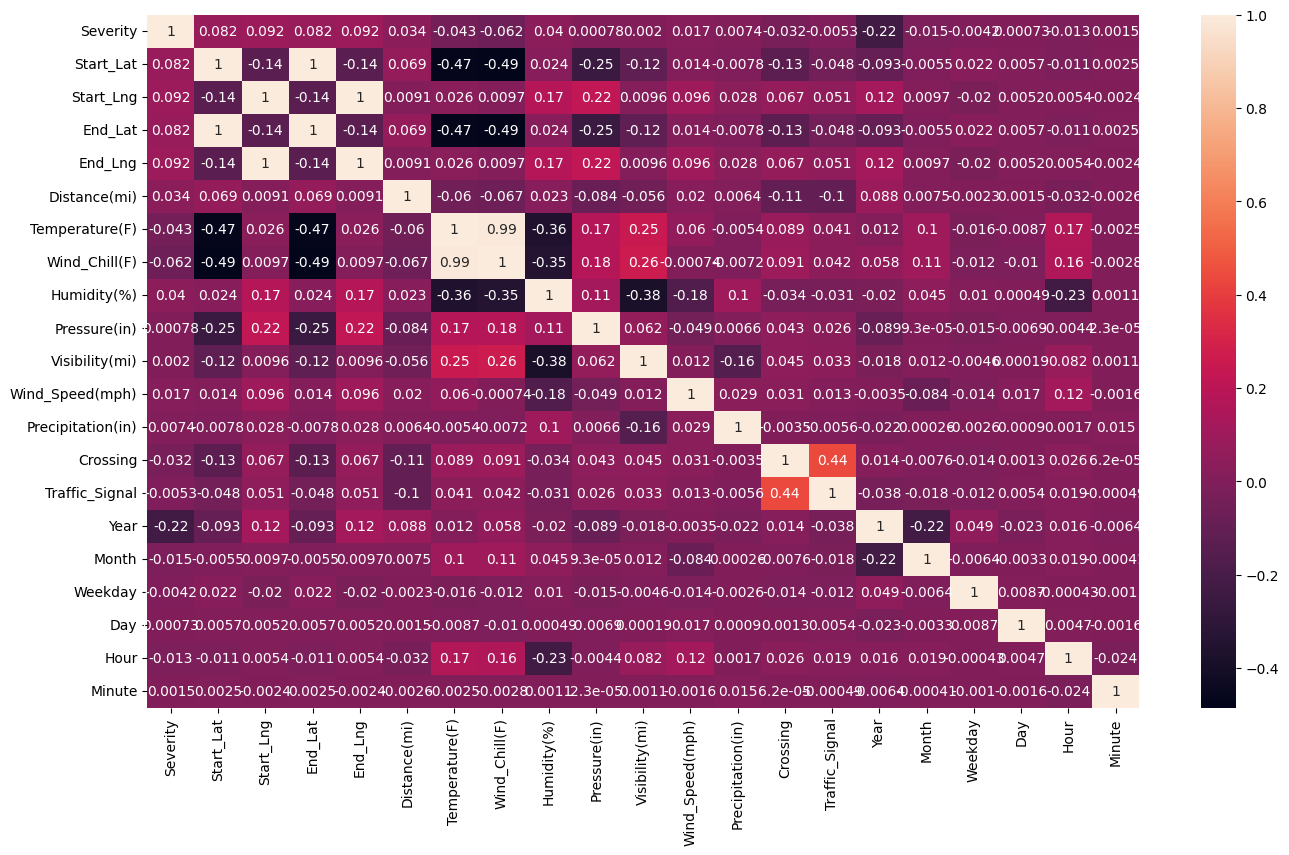

In [6]:
features_to_drop = ['ID', 'Source','Start_Time','End_Time','Description','Weather_Timestamp','Wind_Direction','City','Traffic_Calming','Street','County','State','Zipcode','Country','Timezone','Airport_Code','Weather_Condition','Turning_Loop','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Stop','Station','Roundabout','Railway','No_Exit','Junction','Bump','Amenity','Traffic_Calming','Give_Way']
X = df_new.drop(features_to_drop, axis=1)
plt.figure(figsize=(16,9))
cor = X.corr(method='pearson')
sns.heatmap(cor, annot=True)

In [7]:
df_new.reset_index(drop=True, inplace=True) 
df_new.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,A-4030021,Source1,2,2022-12-13 12:45:19,2022-12-13 14:03:12,43.045713,-88.047363,43.038325,-88.047273,0.510,...,Day,Day,Day,Day,2022,12,1,13,12,45
1,A-4030022,Source1,2,2022-01-17 12:08:00,2022-01-17 14:09:08,29.783896,-95.546130,29.783931,-95.543861,0.136,...,Day,Day,Day,Day,2022,1,0,17,12,8
2,A-4030023,Source1,2,2022-11-08 07:03:30,2022-11-08 08:50:30,38.748783,-76.879469,38.768111,-76.884740,1.365,...,Day,Day,Day,Day,2022,11,1,8,7,3
3,A-4030024,Source1,2,2022-11-01 00:43:00,2022-11-01 02:05:06,34.109993,-118.010919,34.108345,-118.010237,0.120,...,Night,Night,Night,Night,2022,11,1,1,0,43
4,A-4030025,Source1,2,2022-12-19 10:48:00,2022-12-19 12:15:42,42.357973,-79.531784,42.382474,-79.488299,2.792,...,Day,Day,Day,Day,2022,12,0,19,10,48


In [8]:
features_to_drop2 = ['ID', 'Source','Start_Time','End_Time','Description','Weather_Timestamp','Traffic_Calming','Street','County','State','Zipcode','Country','Timezone','Airport_Code','Turning_Loop','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Roundabout','Railway','No_Exit','Bump','Amenity','Give_Way']
X = df_new.drop(features_to_drop2, axis=1)
X.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,Temperature(F),Wind_Chill(F),Humidity(%),...,Junction,Station,Stop,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute
0,2,43.045713,-88.047363,43.038325,-88.047273,0.510,Milwaukee,36.0,28.0,70.0,...,False,False,False,True,2022,12,1,13,12,45
1,2,29.783896,-95.546130,29.783931,-95.543861,0.136,Houston,64.0,64.0,25.0,...,False,False,False,False,2022,1,0,17,12,8
2,2,38.748783,-76.879469,38.768111,-76.884740,1.365,Clinton,45.0,39.0,58.0,...,False,False,False,False,2022,11,1,8,7,3
3,2,34.109993,-118.010919,34.108345,-118.010237,0.120,Arcadia,66.0,66.0,84.0,...,False,False,False,False,2022,11,1,1,0,43
4,2,42.357973,-79.531784,42.382474,-79.488299,2.792,Westfield,31.0,21.0,69.0,...,False,False,False,False,2022,12,0,19,10,48


In [9]:
X.drop_duplicates(inplace=True)
print(len(X.index))

3375940


In [10]:
X[['Pressure(in)','Visibility(mi)']].describe().round(2)

,Pressure(in),Visibility(mi)
count,3303403.00,3288483.00
mean,29.39,9.08
std,1.12,2.65
min,0.00,0.00
25%,29.22,10.00
50%,29.76,10.00
75%,29.99,10.00
max,58.63,140.00


In [11]:
X = X[X['Pressure(in)'] != 0]
X = X[X['Visibility(mi)'] != 0]
X[['Pressure(in)','Visibility(mi)']].describe().round(2)

,Pressure(in),Visibility(mi)
count,3299134.00,3284206.00
mean,29.39,9.09
std,1.12,2.64
min,0.30,0.06
25%,29.22,10.00
50%,29.76,10.00
75%,29.99,10.00
max,58.63,140.00


In [12]:
weather_unique = X['Weather_Condition'].unique()
print(weather_unique)

['Cloudy' 'Fair' 'Partly Cloudy' 'Light Snow' 'Mostly Cloudy' 'Light Rain'
 'Haze' 'Light Rain with Thunder' 'T-Storm' 'Fog' nan 'N/A Precipitation'
 'Rain' 'Cloudy / Windy' 'Freezing Drizzle' 'Light Freezing Drizzle'
 'Heavy Rain' 'Thunder' 'Light Snow / Windy' 'Shallow Fog' 'Light Drizzle'
 'Fair / Windy' 'Heavy T-Storm' 'Light Rain / Windy'
 'Blowing Snow / Windy' 'Mostly Cloudy / Windy' 'Wintry Mix' 'Snow'
 'Thunder in the Vicinity' 'Heavy Snow' 'Partly Cloudy / Windy'
 'Light Snow and Sleet / Windy' 'Light Freezing Rain' 'Rain / Windy'
 'Patches of Fog' 'Snow and Sleet / Windy' 'Haze / Windy' 'Blowing Snow'
 'Fog / Windy' 'Heavy Rain / Windy' 'T-Storm / Windy' 'Smoke'
 'Blowing Dust' 'Snow / Windy' 'Wintry Mix / Windy' 'Heavy Snow / Windy'
 'Light Rain Shower' 'Snow and Sleet' 'Sleet' 'Light Sleet' 'Drizzle'
 'Sleet / Windy' 'Heavy T-Storm / Windy' 'Light Snow Shower'
 'Light Snow and Sleet' 'Showers in the Vicinity' 'Thunder / Windy'
 'Light Rain Shower / Windy' 'Drizzle and Fog'

In [13]:
X.loc[X['Weather_Condition'].str.contains('Thunder|T-Storm',na=False),'Weather_Condition'] = 'Thunderstorm'
X.loc[X['Weather_Condition'].str.contains('Snow|Sleet|Wintry',na=False),'Weather_Condition'] = 'Snow'
X.loc[X['Weather_Condition'].str.contains('Rain|Drizzle|Shower',na=False),'Weather_Condition'] = 'Rain'
X.loc[X['Weather_Condition'].str.contains('Wind|Squalls',na=False),'Weather_Condition'] = 'Windy'
X.loc[X['Weather_Condition'].str.contains('Hail|Pellets',na=False),'Weather_Condition'] = 'Hail'
X.loc[X['Weather_Condition'].str.contains('Fair',na=False),'Weather_Condition'] = 'Clear'
X.loc[X['Weather_Condition'].str.contains('Cloud|Overcast',na=False),'Weather_Condition'] = 'Cloudy'
X.loc[X['Weather_Condition'].str.contains('Mist|Haze|Fog',na=False),'Weather_Condition'] = 'Fog'
X.loc[X['Weather_Condition'].str.contains('Sand|Dust',na=False),'Weather_Condition'] = 'Sand'
X.loc[X['Weather_Condition'].str.contains('Smoke|Volcanic Ash',na=False),'Weather_Condition'] = 'Smoke'
X.loc[X['Weather_Condition'].str.contains('N/A Precipitation',na=False),'Weather_Condition'] = numpy.nan
print(X['Weather_Condition'].unique())

['Cloudy' 'Clear' 'Snow' 'Rain' 'Fog' 'Thunderstorm' nan 'Windy' 'Smoke'
 'Sand' 'Hail' 'Tornado']


In [14]:
X.loc[X['Wind_Direction'] == 'CALM','Wind_Direction'] = 'Calm'
X.loc[X['Wind_Direction'] == 'VAR','Wind_Direction'] = 'Variable'
X.loc[X['Wind_Direction'] == 'East','Wind_Direction'] = 'E'
X.loc[X['Wind_Direction'] == 'North','Wind_Direction'] = 'N'
X.loc[X['Wind_Direction'] == 'South','Wind_Direction'] = 'S'
X.loc[X['Wind_Direction'] == 'West','Wind_Direction'] = 'W'
X['Wind_Direction'] = X['Wind_Direction'].map(lambda x : x if len(x) != 3 else x[1:], na_action = 'ignore')
X['Wind_Direction'].unique()


array(['SE', 'Calm', 'N', 'NW', 'SW', 'S', 'W', 'NE', 'E', nan,
       'Variable'], dtype=object)

In [15]:
X.isna().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                   0
End_Lng                   0
Distance(mi)              0
City                    147
Temperature(F)        83956
Wind_Chill(F)        308520
Humidity(%)           88836
Pressure(in)          72528
Visibility(mi)        87456
Wind_Direction        97133
Wind_Speed(mph)      146751
Precipitation(in)    382739
Weather_Condition     87547
Crossing                  0
Junction                  0
Station                   0
Stop                      0
Traffic_Signal            0
Year                      0
Month                     0
Weekday                   0
Day                       0
Hour                      0
Minute                    0
dtype: int64

In [16]:
# Remove the 'Precipitation(in)' column
features_to_fill = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
X[features_to_fill] =X[features_to_fill].fillna(X[features_to_fill].mean())
X.dropna(inplace=True)
X.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
City                 0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Crossing             0
Junction             0
Station              0
Stop                 0
Traffic_Signal       0
Year                 0
Month                0
Weekday              0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [17]:
X.describe().round(2) 

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Weekday,Day,Hour,Minute
count,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00,3259653.00
mean,2.11,36.26,-96.10,36.26,-96.10,0.84,61.06,59.42,63.77,29.40,9.09,7.44,0.01,2020.88,6.79,2.79,15.72,12.82,29.61
std,0.45,5.27,18.13,5.27,18.12,1.83,19.31,21.15,22.99,1.11,2.63,5.51,0.06,1.32,3.78,1.87,8.65,5.76,17.22
min,1.00,24.57,-124.55,24.57,-124.55,0.00,-89.00,-89.00,1.00,0.30,0.06,0.00,0.00,2016.00,1.00,0.00,1.00,0.00,0.00
25%,2.00,33.46,-117.84,33.46,-117.84,0.06,48.00,48.00,47.00,29.22,10.00,3.00,0.00,2020.00,3.00,1.00,8.00,8.00,15.00
50%,2.00,36.14,-89.97,36.14,-89.97,0.28,63.00,61.00,66.00,29.76,10.00,7.00,0.00,2021.00,7.00,3.00,16.00,14.00,30.00
75%,2.00,40.14,-80.32,40.14,-80.32,0.91,76.00,75.00,83.00,29.99,10.00,10.00,0.00,2022.00,10.00,4.00,23.00,17.00,45.00
max,4.00,49.00,-67.48,49.00,-67.48,155.19,207.00,207.00,100.00,58.63,140.00,1087.00,24.00,2023.00,12.00,6.00,31.00,23.00,59.00


Text(0, 0.5, 'value')

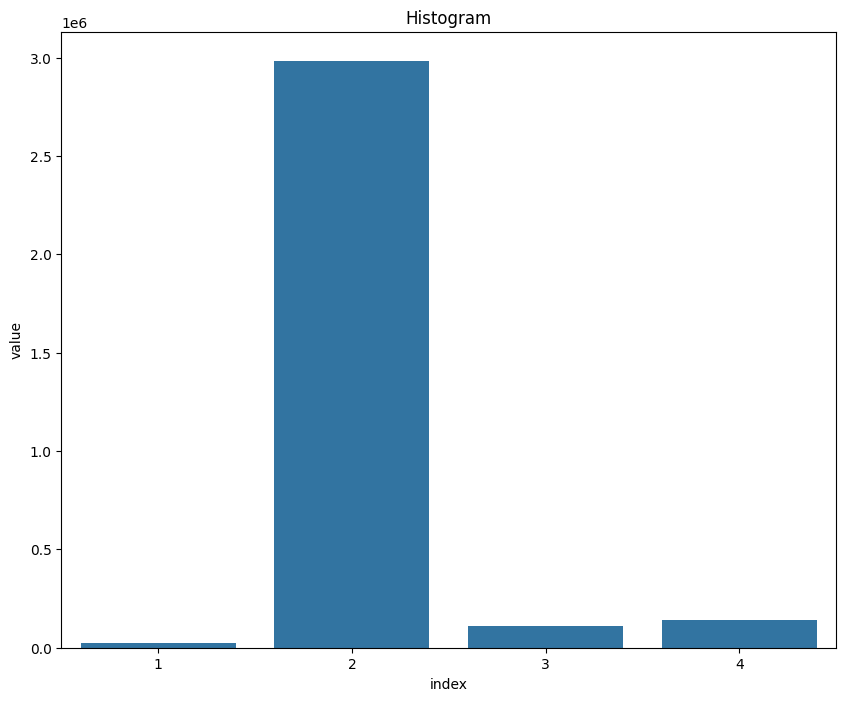

In [18]:
severity_counts = X['Severity'].value_counts()
plt.figure(figsize=(10,8))
plt.title('Histogram')
sns.barplot(x = severity_counts.index, y = severity_counts.values)
plt.xlabel('index')
plt.ylabel('value')


In [19]:
size = len(X[X['Severity'] == 1].index)
df_f = pd.DataFrame()
for i in range(1,5):
    S = X[X['Severity'] == i]
    df_f = pd.concat([df_f, S.sample(size,random_state=42)])
X = df_f


Text(0, 0.5, 'value')

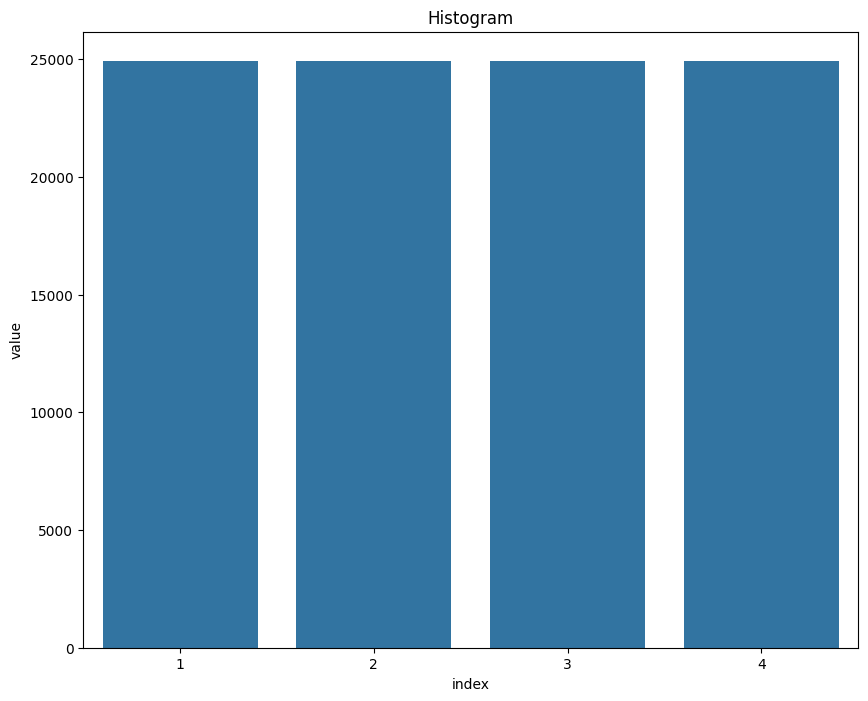

In [20]:
severity_counts = X['Severity'].value_counts()
plt.figure(figsize=(10,8))
plt.title('Histogram')
sns.barplot(x = severity_counts.index, y = severity_counts.values)
plt.xlabel('index')
plt.ylabel('value')



In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaler = ['Visibility(mi)','Wind_Speed(mph)','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Precipitation(in)','Year','Month','Weekday','Day','Hour','Minute']
X[features_scaler] = scaler.fit_transform(X[features_scaler])
X.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,Temperature(F),Wind_Chill(F),Humidity(%),...,Junction,Station,Stop,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute
2977500,1,0.219938,0.615907,29.94506,-90.13184,0.0,New Orleans,0.477733,0.527299,0.755102,...,False,False,False,False,0.5,0.363636,0.333333,0.400000,0.260870,0.576271
3006665,1,0.368937,0.220199,33.58185,-112.18604,0.0,Glendale,0.582996,0.622572,0.051020,...,False,False,False,True,0.5,0.454545,0.333333,0.766667,0.826087,0.525424
3012594,1,0.573529,0.051731,38.57561,-121.57537,0.0,West Sacramento,0.562753,0.604251,0.285714,...,False,False,False,True,0.5,0.454545,0.666667,0.833333,0.652174,0.745763
3042734,1,0.447241,0.489184,35.49313,-97.19460,0.0,Harrah,0.461538,0.512642,0.765306,...,False,False,False,True,0.5,0.454545,0.166667,0.500000,0.304348,0.610169
2977467,1,0.477872,0.675949,36.24077,-86.78551,0.0,Nashville,0.376518,0.435691,0.857143,...,False,False,False,False,0.5,0.363636,0.333333,0.400000,0.217391,0.966102


In [22]:
categorical_features = set(['City','Wind_Direction','Weather_Condition'])
for cat in categorical_features:
    X[cat] = X[cat].astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99712 entries, 2977500 to 1275932
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Severity           99712 non-null  int64   
 1   Start_Lat          99712 non-null  float64 
 2   Start_Lng          99712 non-null  float64 
 3   End_Lat            99712 non-null  float64 
 4   End_Lng            99712 non-null  float64 
 5   Distance(mi)       99712 non-null  float64 
 6   City               99712 non-null  category
 7   Temperature(F)     99712 non-null  float64 
 8   Wind_Chill(F)      99712 non-null  float64 
 9   Humidity(%)        99712 non-null  float64 
 10  Pressure(in)       99712 non-null  float64 
 11  Visibility(mi)     99712 non-null  float64 
 12  Wind_Direction     99712 non-null  category
 13  Wind_Speed(mph)    99712 non-null  float64 
 14  Precipitation(in)  99712 non-null  float64 
 15  Weather_Condition  99712 non-null  category
 16  C

In [23]:
print('Unique class for each category:')
for cat in categorical_features:
    print('{:15s}'.format(cat), '\t', len(X[cat].unique()))

Unique class for each category:
Weather_Condition 	 10
Wind_Direction  	 10
City            	 6995


In [24]:
X = X.replace([True, False], [1,0])
X.head()

C:\Users\thevi\AppData\Local\Temp\ipykernel_1800\496081633.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace([True, False], [1,0])


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,Temperature(F),Wind_Chill(F),Humidity(%),...,Junction,Station,Stop,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute
2977500,1,0.219938,0.615907,29.94506,-90.13184,0.0,New Orleans,0.477733,0.527299,0.755102,...,0,0,0,0,0.5,0.363636,0.333333,0.400000,0.260870,0.576271
3006665,1,0.368937,0.220199,33.58185,-112.18604,0.0,Glendale,0.582996,0.622572,0.051020,...,0,0,0,1,0.5,0.454545,0.333333,0.766667,0.826087,0.525424
3012594,1,0.573529,0.051731,38.57561,-121.57537,0.0,West Sacramento,0.562753,0.604251,0.285714,...,0,0,0,1,0.5,0.454545,0.666667,0.833333,0.652174,0.745763
3042734,1,0.447241,0.489184,35.49313,-97.19460,0.0,Harrah,0.461538,0.512642,0.765306,...,0,0,0,1,0.5,0.454545,0.166667,0.500000,0.304348,0.610169
2977467,1,0.477872,0.675949,36.24077,-86.78551,0.0,Nashville,0.376518,0.435691,0.857143,...,0,0,0,0,0.5,0.363636,0.333333,0.400000,0.217391,0.966102


In [25]:
onehot_cols = list(categorical_features - set(['City']))
X = pd.get_dummies(X, columns=onehot_cols, drop_first=True)
X.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,Temperature(F),Wind_Chill(F),Humidity(%),...,Weather_Condition_Windy,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W
2977500,1,0.219938,0.615907,29.94506,-90.13184,0.0,New Orleans,0.477733,0.527299,0.755102,...,False,True,False,False,False,False,False,False,False,False
3006665,1,0.368937,0.220199,33.58185,-112.18604,0.0,Glendale,0.582996,0.622572,0.051020,...,False,False,False,False,False,False,False,False,False,True
3012594,1,0.573529,0.051731,38.57561,-121.57537,0.0,West Sacramento,0.562753,0.604251,0.285714,...,False,False,False,False,False,False,False,True,False,False
3042734,1,0.447241,0.489184,35.49313,-97.19460,0.0,Harrah,0.461538,0.512642,0.765306,...,False,False,False,False,False,True,False,False,False,False
2977467,1,0.477872,0.675949,36.24077,-86.78551,0.0,Nashville,0.376518,0.435691,0.857143,...,False,True,False,False,False,False,False,False,False,False


In [26]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import category_encoders as ce
binary_encoder = ce.binary.BinaryEncoder()
city_binary_enc = binary_encoder.fit_transform(X['City'])
city_binary_enc

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
2977500,0,0,0,0,0,0,0,0,0,0,0,0,1
3006665,0,0,0,0,0,0,0,0,0,0,0,1,0
3012594,0,0,0,0,0,0,0,0,0,0,0,1,1
3042734,0,0,0,0,0,0,0,0,0,0,1,0,0
2977467,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960012,0,0,1,1,0,1,0,0,0,1,0,0,1
1396157,0,0,0,0,0,0,0,1,1,0,1,1,1
3690592,0,0,1,0,1,1,1,1,0,1,1,1,1
1389205,0,1,1,0,0,1,0,1,0,1,1,0,1


In [28]:
X = pd.concat([X, city_binary_enc], axis = 1).drop('City', axis=1)
X.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
2977500,1,0.219938,0.615907,29.94506,-90.13184,0.0,0.477733,0.527299,0.755102,30.10,...,0,0,0,0,0,0,0,0,0,1
3006665,1,0.368937,0.220199,33.58185,-112.18604,0.0,0.582996,0.622572,0.051020,28.48,...,0,0,0,0,0,0,0,0,1,0
3012594,1,0.573529,0.051731,38.57561,-121.57537,0.0,0.562753,0.604251,0.285714,29.72,...,0,0,0,0,0,0,0,0,1,1
3042734,1,0.447241,0.489184,35.49313,-97.19460,0.0,0.461538,0.512642,0.765306,28.77,...,0,0,0,0,0,0,0,1,0,0
2977467,1,0.477872,0.675949,36.24077,-86.78551,0.0,0.376518,0.435691,0.857143,29.58,...,0,0,0,0,0,0,0,1,0,1


In [29]:
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [30]:
X, X_test = train_test_split(X,test_size=.2, random_state=42)
print(X.shape, X_test.shape)

(79769, 55) (19943, 55)


In [31]:
sample = X
y_sample = sample['Severity']
X_sample = sample.drop('Severity',axis=1)

X_train, X_validate, y_train, y_validate = train_test_split (X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(59826, 54) (59826,)
(19943, 54) (19943,)


In [32]:
dtc = tree.DecisionTreeClassifier (random_state = 42)
parameters = [{'criterion':['gini','entropy'], 'max_depth': [5,10,15,30]}]
grid = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate,y_validate))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best
{'criterion': 'gini', 'max_depth': 10}
Train score: 0.7790425567479022
Validation score: 0.7521436092864664


In [33]:
print("Default scores:")
dtc.fit(X_train, y_train)
print("Train score:", dtc.score(X_train, y_train))
print("Validation score:", dtc.score(X_validate, y_validate))

Default scores:
Train score: 0.9994818306421956
Validation score: 0.719651005365291


In [34]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1.085721,0.034147,0.011825,0.002653,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.746615,0.743585,0.738487,0.742081,0.747931,0.743740,0.003353,1
6,1.826854,0.067447,0.007586,0.004536,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.739930,0.744087,0.747430,0.739323,0.743920,0.742938,0.002986,2
2,1.502716,0.042603,0.012034,0.002094,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.742604,0.741914,0.743084,0.736732,0.743251,0.741517,0.002437,3
5,1.348655,0.065964,0.010104,0.000008,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.739345,0.737819,0.742332,0.735729,0.741329,0.739311,0.002377,4
7,1.856404,0.073602,0.003672,0.003731,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.710680,0.707982,0.722775,0.715002,0.713247,0.713937,0.005016,5
3,1.882295,0.035551,0.008606,0.002321,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.709176,0.705809,0.713247,0.706644,0.714333,0.709842,0.003426,6
0,0.588989,0.068374,0.010600,0.002959,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.700318,0.693857,0.695529,0.685416,0.694275,0.693879,0.004816,7
4,0.705651,0.032337,0.008200,0.005086,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.677002,0.666360,0.668450,0.659089,0.674216,0.669023,0.006273,8


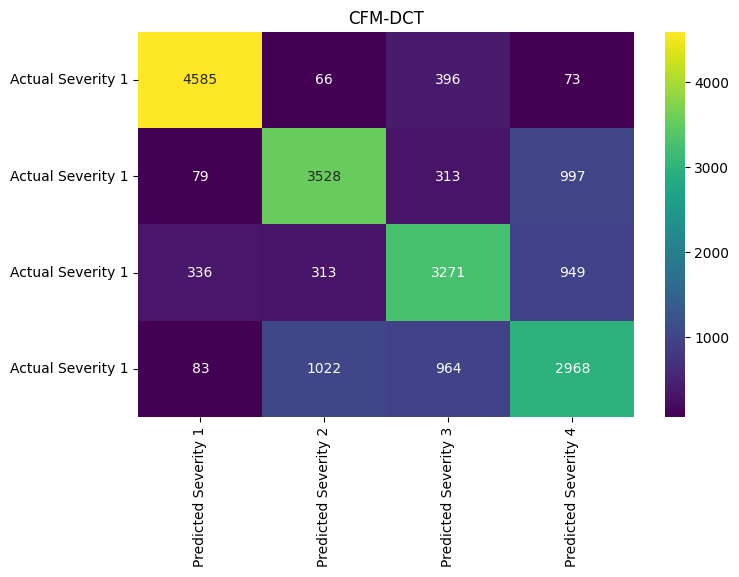

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = dtc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ['Actual Severity 1','Actual Severity 1','Actual Severity 1','Actual Severity 1']
columns = ['Predicted Severity 1','Predicted Severity 2','Predicted Severity 3','Predicted Severity 4']
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, fmt='d', cmap='viridis')
plt.title("CFM-DCT")
plt.show()

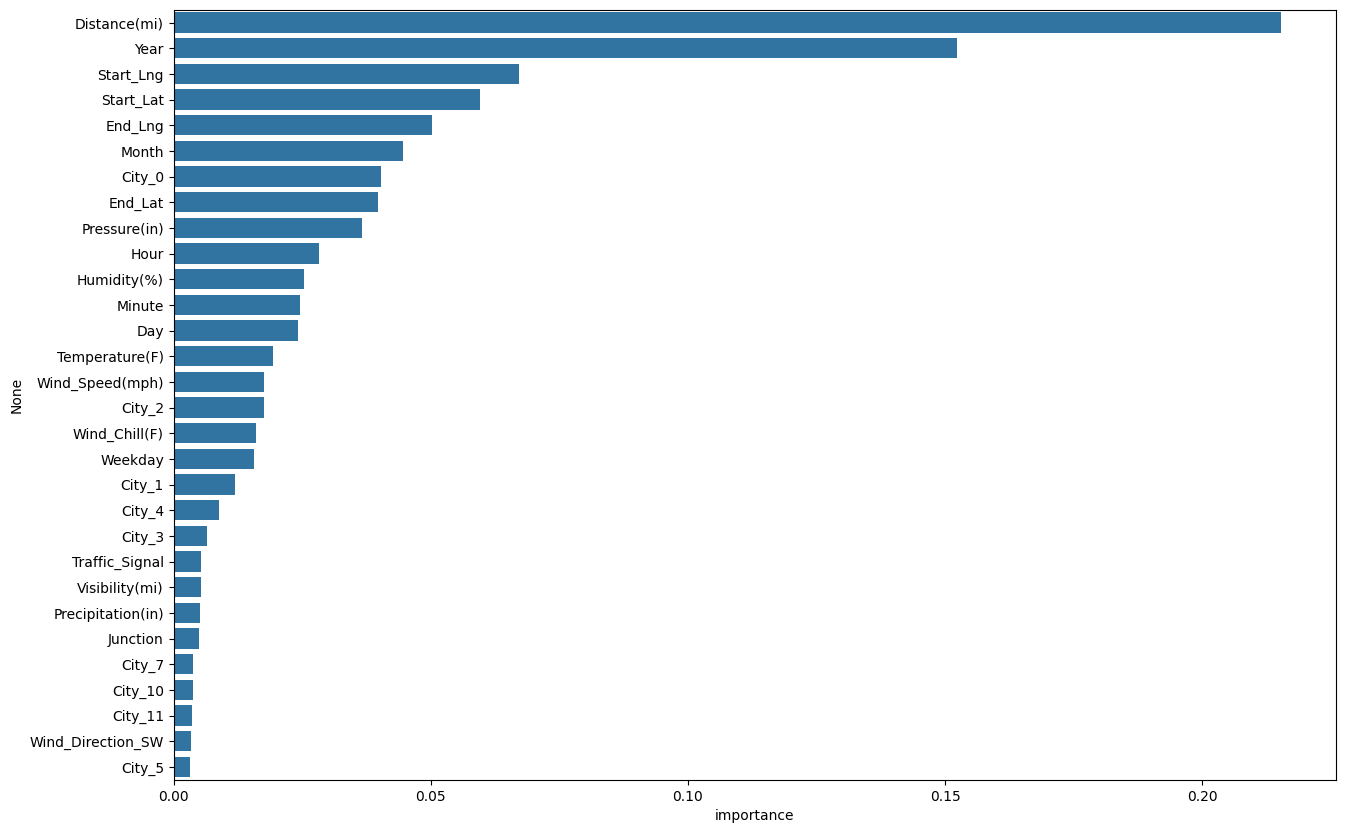

In [36]:
importances = pd.DataFrame(numpy.zeros((X_train.shape[1],1)), columns = ['importance'], index=X_train.columns)
importances.iloc[:,0] = dtc.feature_importances_
importances = importances.sort_values(by='importance', ascending=False)[:30]

plt.figure(figsize=(15,10))
sns.barplot(x='importance',y=importances.index, data=importances)
plt.show()

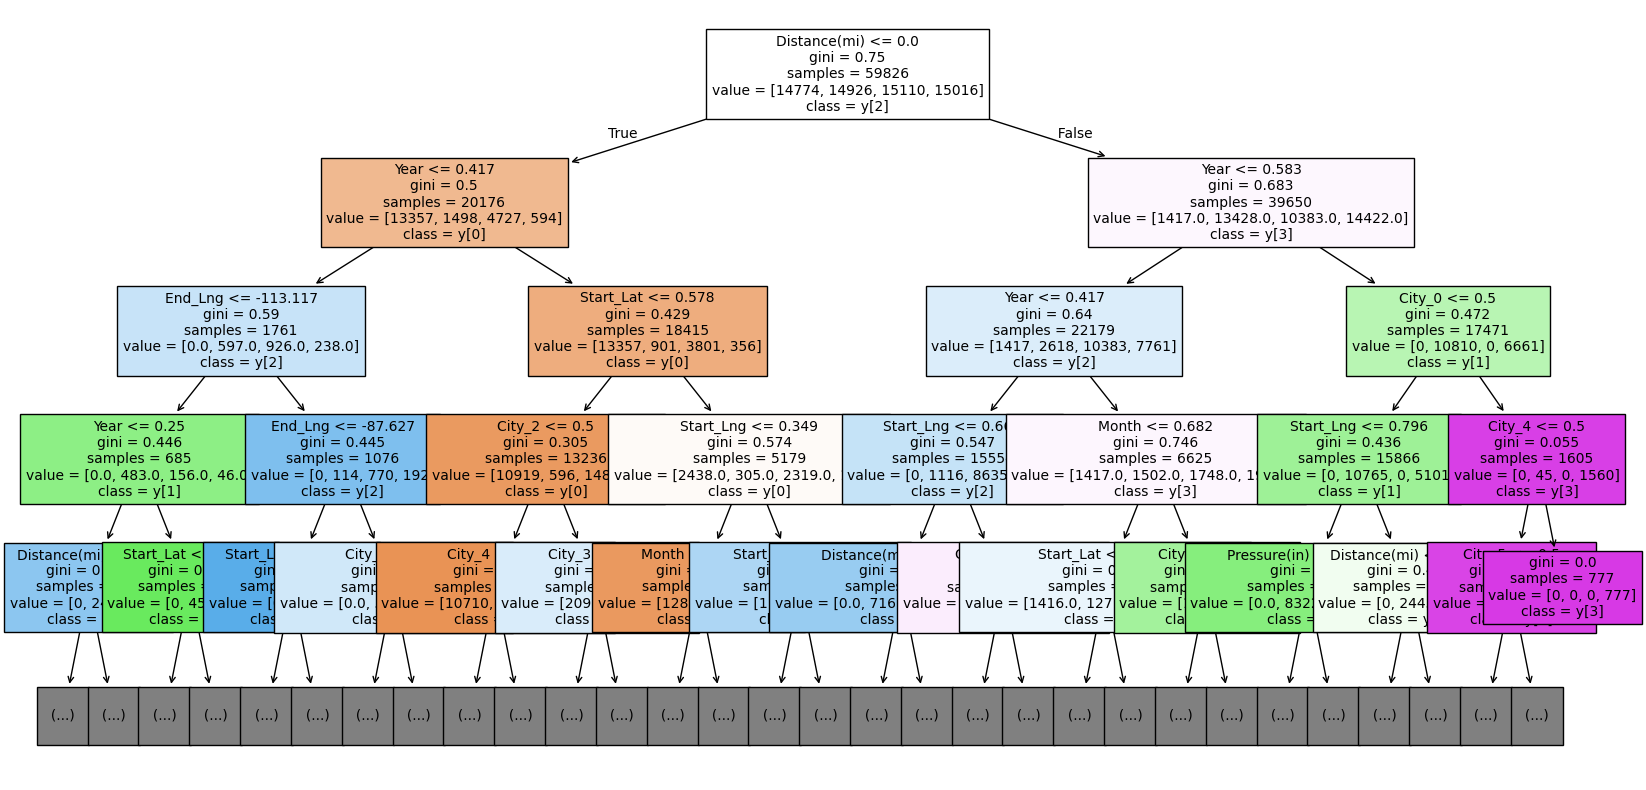

In [37]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dtc, max_depth=4, fontsize=10, feature_names=X_train.columns.to_list(), class_names=True, filled=True)
plt.show()

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy["Decision Tree"] = accuracy_score(y_validate, y_pred)
print(accuracy["Decision Tree"])

0.719651005365291


In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs = -1, random_state = 42)
parameters = [{"n_estimators" :[50,100,200,500], "max_depth" : [5,10,15,30]}]
grid = GridSearchCV(rfc, parameters, verbose = 5, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate,y_validate))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best
{'max_depth': 30, 'n_estimators': 500}
Train score: 0.9994316852204727
Validation score: 0.7977235120092263


In [42]:
print("Default scores:")
rfc.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Validation score:", rfc.score(X_validate, y_validate))

Default scores:
Train score: 0.9994316852204727
Validation score: 0.79566765281051


In [43]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,56.217766,2.423194,1.514822,1.166886,30,500,"{'max_depth': 30, 'n_estimators': 500}",0.794585,0.787631,0.792980,0.787129,0.788132,0.790091,0.003072,1
14,30.576897,0.871216,6.460022,1.256431,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.791409,0.787213,0.790639,0.786962,0.784956,0.788236,0.002420,2
13,22.862337,2.515917,6.911007,1.340806,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.791242,0.783619,0.788466,0.783619,0.782532,0.785896,0.003373,3
11,60.305089,5.753698,7.181836,0.888558,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.784556,0.780443,0.782950,0.783285,0.780276,0.782302,0.001675,4
10,26.326587,1.524845,6.297486,1.413929,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.783303,0.779440,0.780025,0.780861,0.777936,0.780313,0.001774,5
9,16.443938,1.801819,3.272045,0.578583,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.784807,0.778521,0.779941,0.779022,0.776097,0.779678,0.002862,6
12,14.111549,2.330611,7.144106,1.279847,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.783637,0.778855,0.780527,0.777267,0.777685,0.779594,0.002316,7
8,11.731358,1.637273,6.366055,0.809649,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.781631,0.773924,0.773757,0.775679,0.772252,0.775449,0.003277,8
7,41.741794,2.667295,4.286986,0.503664,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.761825,0.754450,0.757041,0.756289,0.762474,0.758416,0.003169,9
6,16.358981,1.739687,6.247971,1.429042,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.761240,0.754450,0.757292,0.755788,0.761137,0.757981,0.002769,10


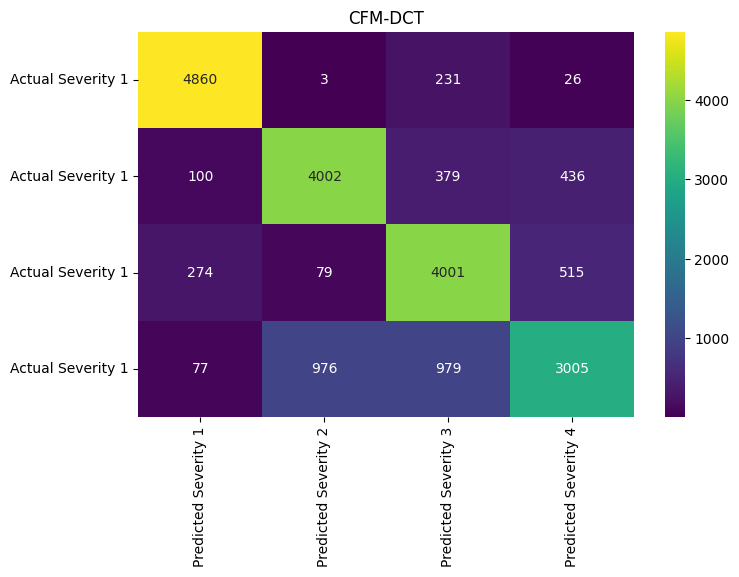

In [44]:
y_pred = rfc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ['Actual Severity 1','Actual Severity 1','Actual Severity 1','Actual Severity 1']
columns = ['Predicted Severity 1','Predicted Severity 2','Predicted Severity 3','Predicted Severity 4']
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, fmt='d', cmap='viridis')
plt.title("CFM-DCT")
plt.show()

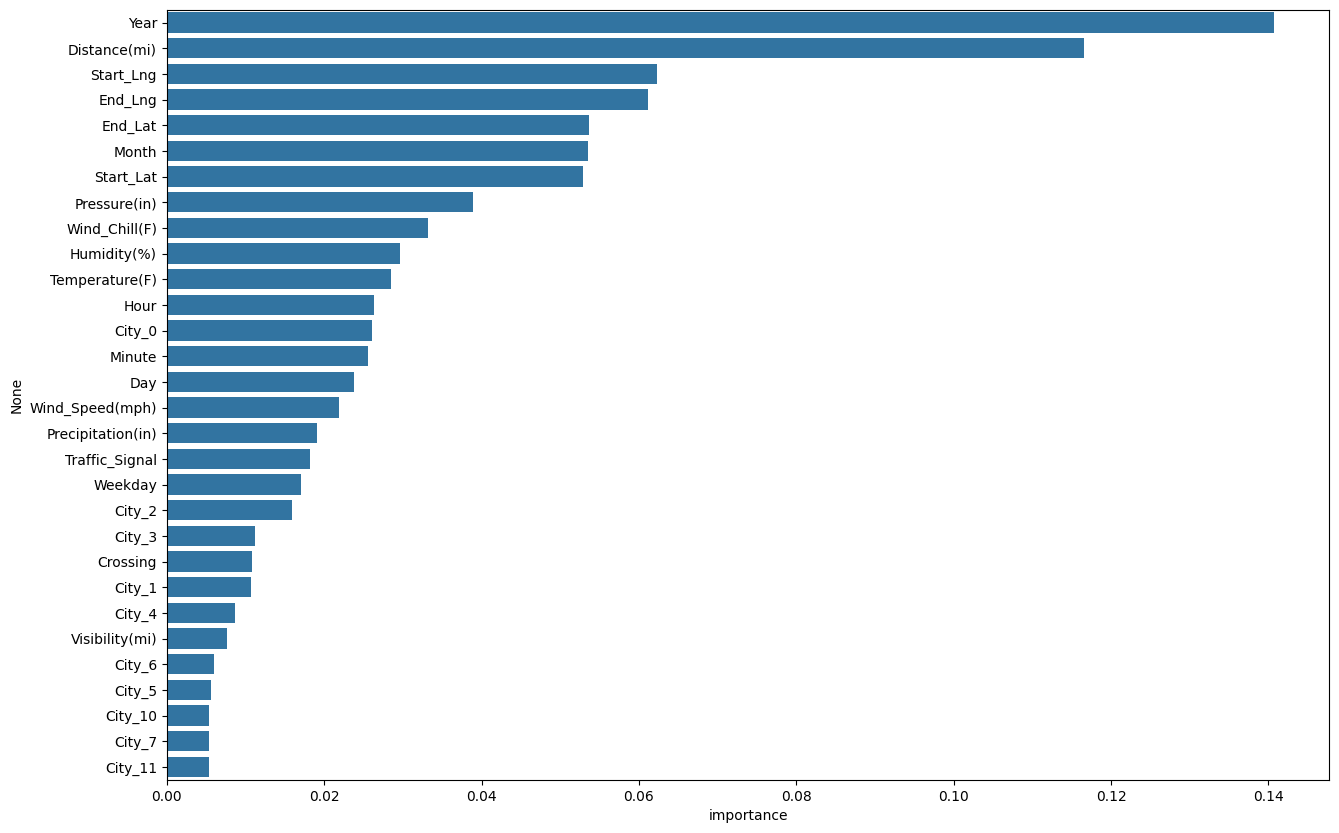

In [49]:
importances = pd.DataFrame(numpy.zeros((X_train.shape[1],1)), columns = ['importance'], index=X_train.columns)
importances.iloc[:,0] = rfc.feature_importances_
importances = importances.sort_values(by='importance', ascending=False)[:30]

plt.figure(figsize=(15,10))
sns.barplot(x='importance',y=importances.index, data=importances)
plt.show()

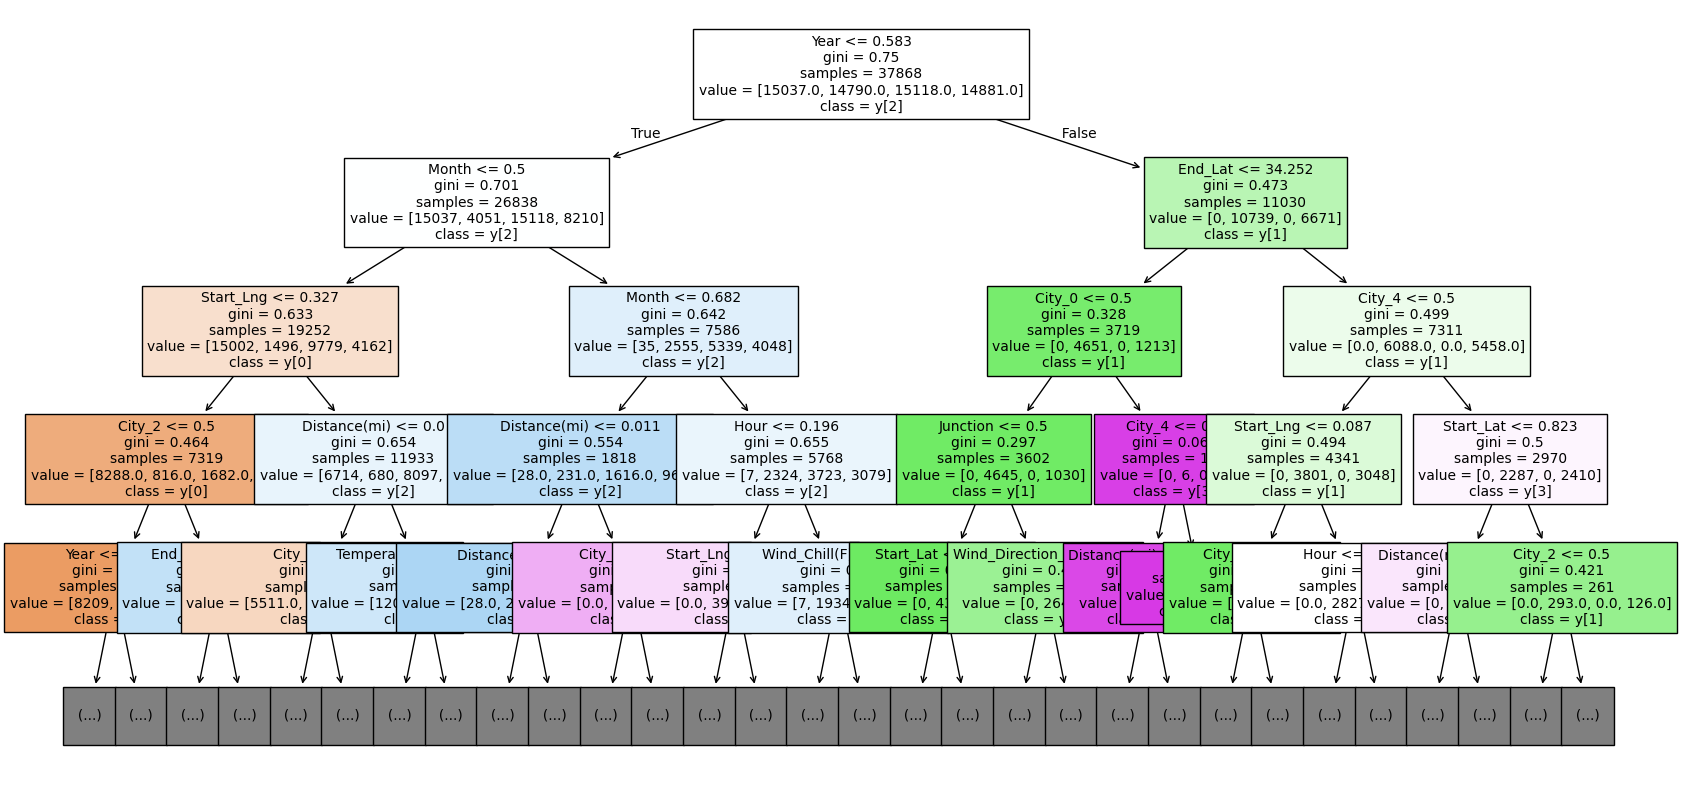

In [50]:
tree = rfc.estimators_[0]

fig, ax = plt.subplots(figsize=(20,10))
plot_tree(tree, max_depth = 4, fontsize=10, feature_names=X_train.columns.to_list(), class_names=True, filled=True)
plt.show()

In [51]:
accuracy["Random Forest"] = accuracy_score(y_validate, y_pred)
print(accuracy["Random Forest"])

0.79566765281051


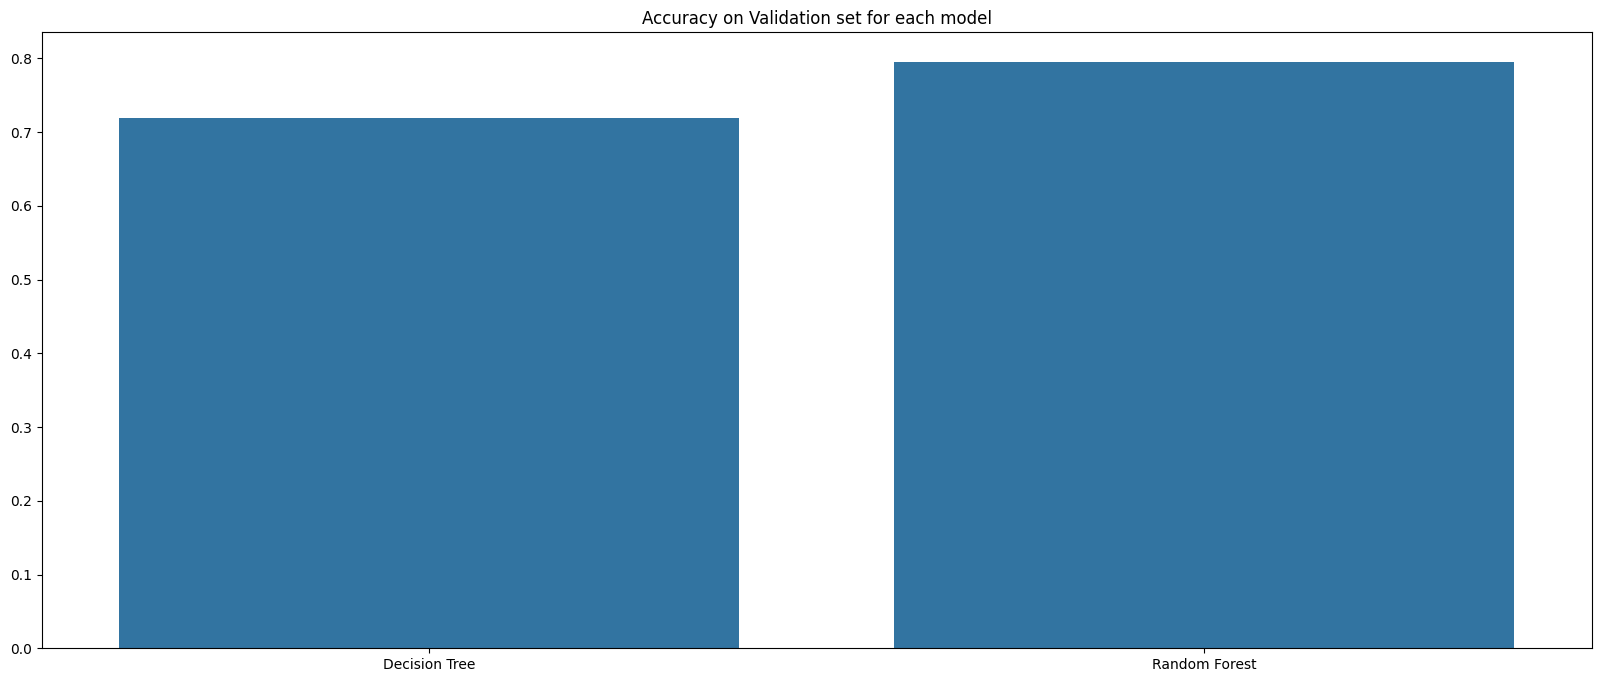

In [52]:
plt.figure(figsize=(20,8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(x = list(range(len(accuracy))), y = list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()